In [1]:
import npp
from npp.FormFactor import makeFormFactor

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


This module provides the function makeFormFactor

    Produces a plot of the radial charge distribution and a plot of the square of its Fourier 
    transform, normalised such that F(0)=1. 
    Arguments:
         chargeDistribution: 
             - a function of one parameter, the radius, should return one float: the charge density f(r)
             - or a list of such functions
         Rmax: maximum radius, default is 10

    adapted from a program by Renju Mathew
    


In [2]:
def FlatWithFalloff(radius, fall_off):
    ''' Spherical charge distribution that is flat for r < radius 
        and an exponential fall-off exp(-fall_off*(r-radius)) for
        r > R
    '''
    def fn(r):
        if r<radius:
            return 1
        else:
            return np.exp(-fall_off*(r-radius))
    return fn

<IPython.core.display.Javascript object>


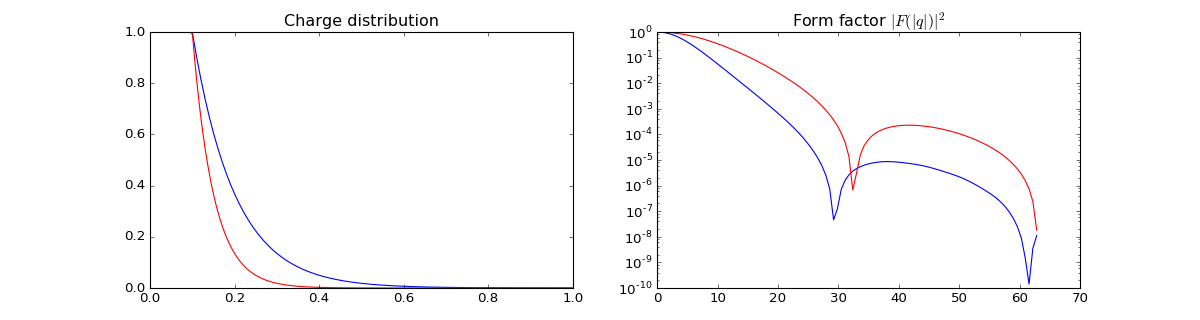

In [3]:
makeFormFactor(
    [FlatWithFalloff(0.1, 10),
     FlatWithFalloff(0.1, 20)],
    Rmax=1)

In [4]:
def WoodsSaxon(R,a):
    '''Spherical charge distribution with two parameters R and a
                       1.0/(1+np.exp((r-R)/a))
    '''
    def fn(r):
        return 1.0/(1+np.exp((r-R)/a))
    return fn

<IPython.core.display.Javascript object>


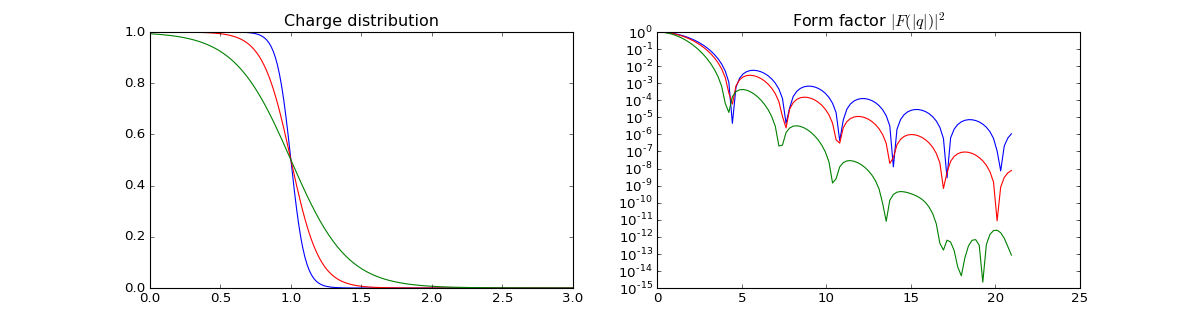

In [5]:
makeFormFactor([WoodsSaxon(1,0.05),WoodsSaxon(1,0.1),WoodsSaxon(1,0.2)],Rmax=3)

In [6]:
def Workshop4(Z,a):
    ''' Distribution of first exercise of workshop 4, the units of a and the argument
        of the function have to be inverse of each other.
    '''
    def fn(r):
        return (1+(Z-2)*r**2*a**2/6.0)*exp(-r**2*a**2/2.0)
    return fn

<IPython.core.display.Javascript object>


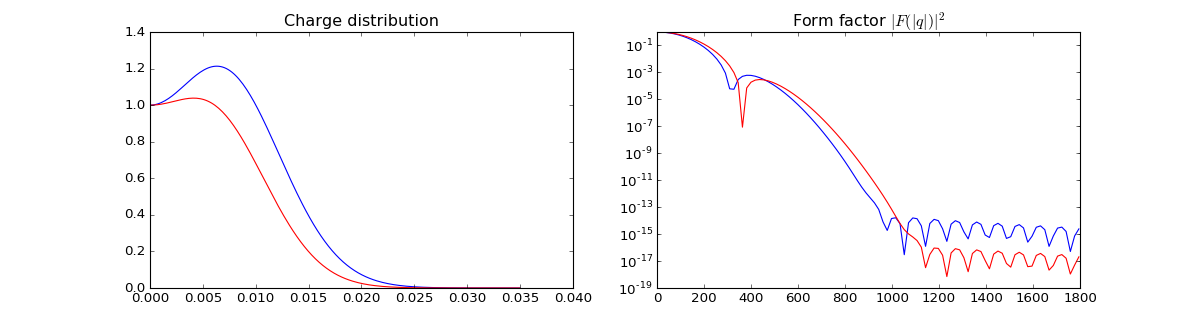

In [7]:
makeFormFactor(
    [Workshop4(8,158.3),
     Workshop4(6,171.2)],
     Rmax=0.035)